In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import string

In [2]:
periods_map = {
    "The Belle Époque (1900-1914)": {"start_year": 1900, "end_year": 1914},
    "World War I (1914-1918)": {"start_year": 1914, "end_year": 1919},
    "The Roaring Twenties (1920-1929)": {"start_year": 1920, "end_year": 1929},
    "The Great Depression (1929-1939)": {"start_year": 1929, "end_year": 1939},
    "World War II (1939-1945)": {"start_year": 1939, "end_year": 1946},
    "The Cold War and McCarthyism (1947-1991)": {"start_year": 1947, "end_year": 1991},
    "The Civil Rights and Social Equality Struggles (1950s-1970s)": {"start_year": 1950, "end_year": 1970},
    "The Reagan Years and the Rise of Neoliberalism (1980s)": {"start_year": 1980, "end_year": 1989},
    "The Post-Cold War and the New World Order (1991-2001)": {"start_year": 1991, "end_year": 2001},
    "The 9/11 Attacks and the War on Terrorism (2001-present)": {"start_year": 2001, "end_year": 2024},
}

def map_year_to_periods(year, periods):
    matching_periods = []
    for period, years in periods.items():
        if years['start_year'] <= year <= years['end_year']:
            matching_periods.append(period)
    if matching_periods:
        return matching_periods
    else:
        return ["Year not in any defined period"]
    
# Sort the periods based on their start year
sorted_periods = sorted(periods_map.items(), key=lambda x: x[1]['start_year'])
# Create a mapping from period name to its position in the timeline
period_order_map = {period[0]: idx for idx, period in enumerate(sorted_periods)}

periods_events_map = {
    "The Belle Époque (1900-1914)": [
        "third Great Awakening", 
        "economic prosperity", 
        "segregation"
    ],
    "World War I (1914-1918)": [
        "segregation", 
        "1st world war"
    ],
    "The Roaring Twenties (1920-1929)": [
        "economic euphoria", 
        "industrial expansion", 
        "cultural change", 
        "rise of women's rights", 
        "stock market boom", 
        "prohibition"
    ],
    "The Great Depression (1929-1939)": [
        "1929 stock market crash", 
        "mass unemployment", 
        "New Deal reforms"
    ],
    "World War II (1939-1945)": [
        "military production recovery", 
        "U.S. contribution to Allies", 
        "new technologies", 
        "United Nations"
    ],
    "The Cold War and McCarthyism (1947-1991)": [
        "capitalist vs communist blocs", 
        "internal political repression", 
        "Korean War", 
        "Cuban Missile Crisis", 
        "Vietnam War", 
        "space race"
    ],
    "The Civil Rights and Social Equality Struggles (1950s-1970s)": [
        "civil rights movements", 
        "Martin Luther King Jr.", 
        "Civil Rights Act", 
        "Voting Rights Act", 
        "women’s and LGBTQ+ rights"
    ],
    "The Reagan Years and the Rise of Neoliberalism (1980s)": [
        "conservative shift", 
        "deregulation", 
        "tax cuts", 
        "War on drugs", 
        "arms race", 
        "new technologies"
    ],
    "The Post-Cold War and the New World Order (1991-2001)": [
        "fall of the Soviet Union", 
        "technological advancements", 
        "Gulf War", 
        "internet development", 
        "1990s economic boom"
    ],
    "The 9/11 Attacks and the War on Terrorism (2001-present)": [
        "9/11 attacks", 
        "War on Terror", 
        "Patriot Act", 
        "Iraq War", 
        "2008 financial crisis", 
        "geopolitical tensions"
    ]
}

dataframes column'names are taken from the `README.md` file in the dataset

In [3]:
# display full numbers separated with spaces instead of scientific notation
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(",", " "))
pd.reset_option('display.float_format')

## Characters

In [11]:
characters_df = pd.read_csv("data/processed_characters.csv")


In [12]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440622 entries, 0 to 440621
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Freebase movie ID                440622 non-null  object 
 1   Movie release date               440622 non-null  int64  
 2   Actor date of birth              335384 non-null  float64
 3   Actor gender                     430966 non-null  object 
 4   Actor ethnicity (Freebase ID)    102839 non-null  object 
 5   Actor name                       439414 non-null  object 
 6   Freebase character/actor map ID  440622 non-null  object 
 7   Freebase actor ID                439822 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 26.9+ MB


In [13]:
characters_df.describe()

,Movie release date,Actor date of birth
count,440622.000000,335384.000000
mean,1984.530566,1943.059827
std,25.245842,34.095926
min,1900.000000,19.000000
25%,1969.000000,1923.000000
50%,1994.000000,1948.000000
75%,2005.000000,1966.000000
max,2016.000000,9900.000000


In [14]:
print("percentage of NaNs per columns")
characters_df.isna().mean() * 100

percentage of NaNs per columns


Freebase movie ID                   0.000000
Movie release date                  0.000000
Actor date of birth                23.883964
Actor gender                        2.191448
Actor ethnicity (Freebase ID)      76.660494
Actor name                          0.274158
Freebase character/actor map ID     0.000000
Freebase actor ID                   0.181562
dtype: float64

In [15]:
characters_df.sample(10)

,Freebase movie ID,Movie release date,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID),Actor name,Freebase character/actor map ID,Freebase actor ID
259363,/m/02mmwk,2005,1994.0,F,/m/01qhm_,Dakota Fanning,/m/0k7w6g,/m/0fthdk
157828,/m/03y8m4h,2008,1947.0,M,NaN,Srinivasa Rao Kota,/m/09j118c,/m/02ql_ms
359636,/m/0cp0m9_,2010,NaN,M,NaN,Jan Pocepický,/m/0cpm096,/m/0cpm099
113589,/m/02x01k0,2007,NaN,M,/m/0dryh9k,Ninad Kamat,/m/0h5v0z_,/m/027wtxb
254336,/m/02r6n8_,1940,1903.0,M,NaN,Curly Howard,/m/02vcdf1,/m/045g4l
78939,/m/074f6p,1991,1948.0,M,NaN,John Clarke,/m/0jx30n,/m/03mvk8
56204,/m/05qss9,1995,NaN,M,NaN,John Link Graney,/m/0gclgxz,/m/0gcdk97
240247,/m/0479qny,2008,1977.0,M,NaN,Ike Barinholtz,/m/05cmnbc,/m/09br2g
173877,/m/0hrdn0y,2011,1950.0,M,/m/03lmx1,Robbie Coltrane,/m/0n4rzz5,/m/06ltr
97989,/m/064lp15,2010,1941.0,M,NaN,Beau Bridges,/m/0btj6wz,/m/03xkps


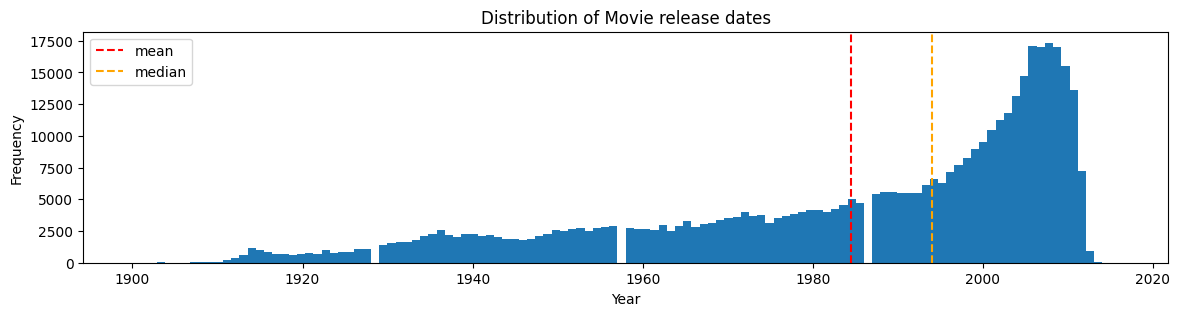

In [18]:
movie_dates = characters_df['Movie release date'].astype(int) #pd.to_datetime(characters_df['Movie release date'], errors='coerce').dt.year
plt.figure(figsize=(14,3))
plt.hist(movie_dates, bins=2020-1900)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie release dates')
plt.axvline(movie_dates.mean(), linestyle="--", color="red", label="mean")
plt.axvline(movie_dates.median(), color="orange", label="median", linestyle="--")
plt.legend()
plt.show()

<Axes: title={'center': 'Actor age at movie release'}, xlabel='Age', ylabel='Frequency'>

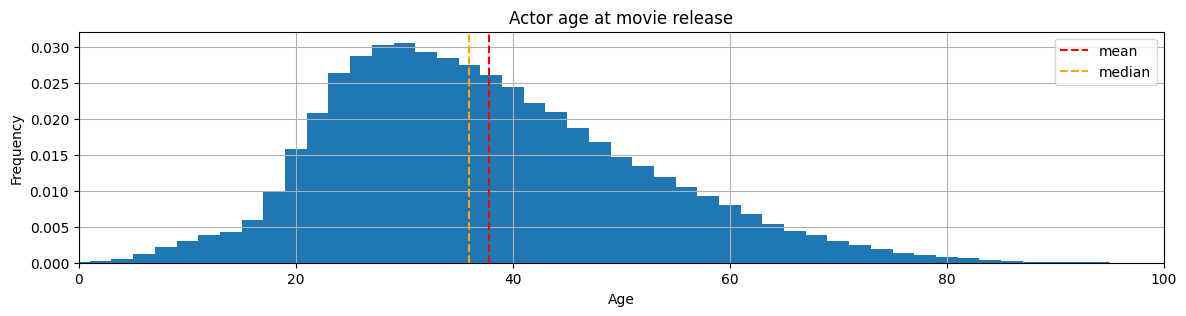

In [23]:
characters_df_noproccessed = pd.read_csv("data/character.metadata.tsv", delimiter="\t", header=None)
characters_df_noproccessed.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

plt.figure(figsize=(14,3))
plt.title("Actor age at movie release")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.axvline(characters_df_noproccessed["Actor age at movie release"].mean(), linestyle="--", color="red", label="mean")
plt.axvline(characters_df_noproccessed["Actor age at movie release"].median(), color="orange", label="median", linestyle="--")
plt.legend()
characters_df_noproccessed["Actor age at movie release"].hist(bins=4000, density=True)

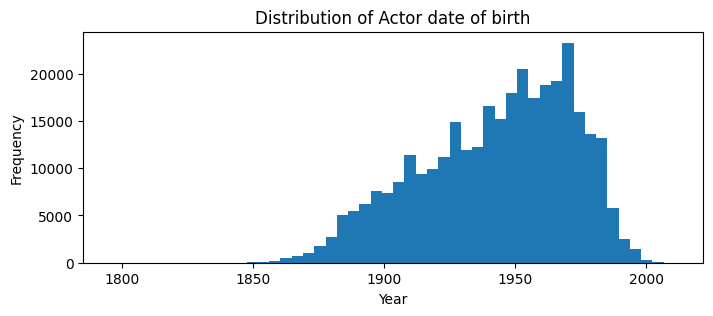

In [24]:

actor_dates = pd.to_datetime(characters_df_noproccessed['Actor date of birth'], errors='coerce').dt.year


plt.figure(figsize=(8,3))
plt.hist(actor_dates, bins=50)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Actor date of birth')
plt.show()


<Axes: xlabel='Actor gender', ylabel='number'>

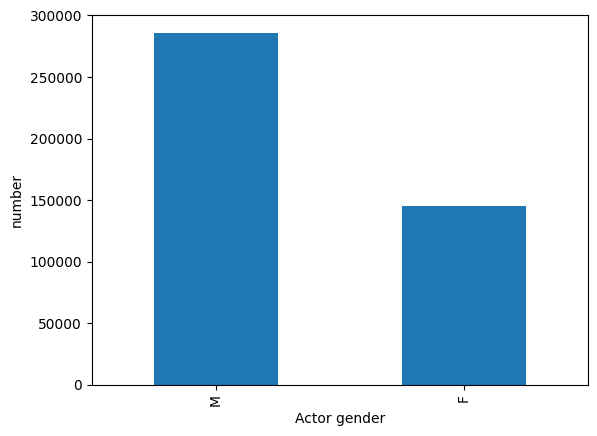

In [25]:
plt.xlabel("gender")
plt.ylabel("number")
characters_df["Actor gender"].value_counts().plot(kind="bar")

# Movies

## Genres

In [26]:
# These genre are not very relevant of the content of the movie
unwanted_genres = ['Silent film', 'Short Film']

Filter the movies dataset. We only keep the movies released after 1900 and from the USA.

In [27]:
movies_df = pd.read_csv("data/processed_movies.csv")

movies_df['Period'] = movies_df['Movie release date'].apply(map_year_to_periods, periods=periods_map)

movies_df['Period'].head(10)

0    [The Post-Cold War and the New World Order (19...
1    [The Post-Cold War and the New World Order (19...
2                       [The Belle Époque (1900-1914)]
3                   [The Great Depression (1929-1939)]
4                   [The Great Depression (1929-1939)]
5    [The Post-Cold War and the New World Order (19...
6    [The Cold War and McCarthyism (1947-1991), The...
7    [The Post-Cold War and the New World Order (19...
8                   [The Great Depression (1929-1939)]
9    [The Post-Cold War and the New World Order (19...
Name: Period, dtype: object

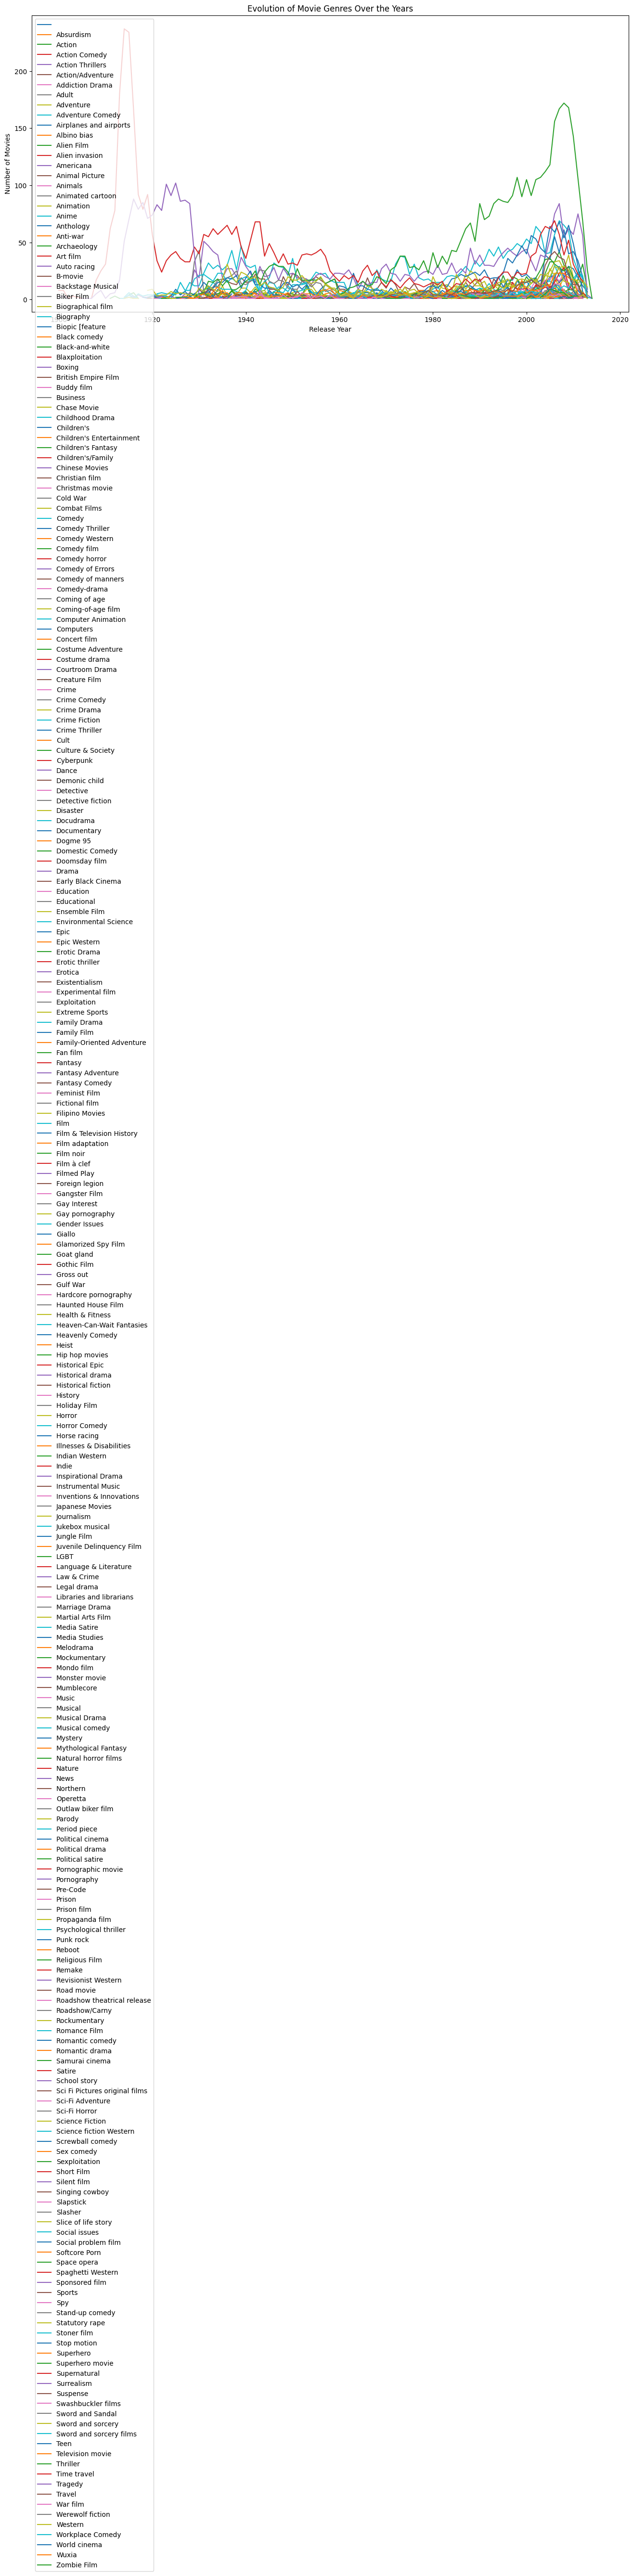

In [28]:
movies_2df = movies_df.copy()

# Define a function to extract the genre from a string
def extract_genre(genres):
    # Split the string into a list of genres
    genres_list = genres.split(',')
    # Remove leading and trailing whitespace and punctuation from the first genre string
    genre = genres_list[0].strip(string.punctuation + string.whitespace)
    # Return the cleaned genre string
    return genre

# Apply the function to the 'genres' column
movies_2df['Movie genres'] = movies_2df['Movie genres'].apply(extract_genre)

# Group the movies by genre and release year, and count the number of movies in each group
genre_counts = movies_2df.groupby(['Movie genres', 'Movie release date']).size().reset_index(name='count')

# Pivot the table so that each genre has its own column
genre_counts_pivot = genre_counts.pivot(index='Movie release date', columns='Movie genres', values='count')

# Plot the number of movies in each genre for each year
plt.figure(figsize=(16,8))
plt.plot(genre_counts_pivot)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Evolution of Movie Genres Over the Years')
plt.legend(genre_counts_pivot.columns)
plt.show()


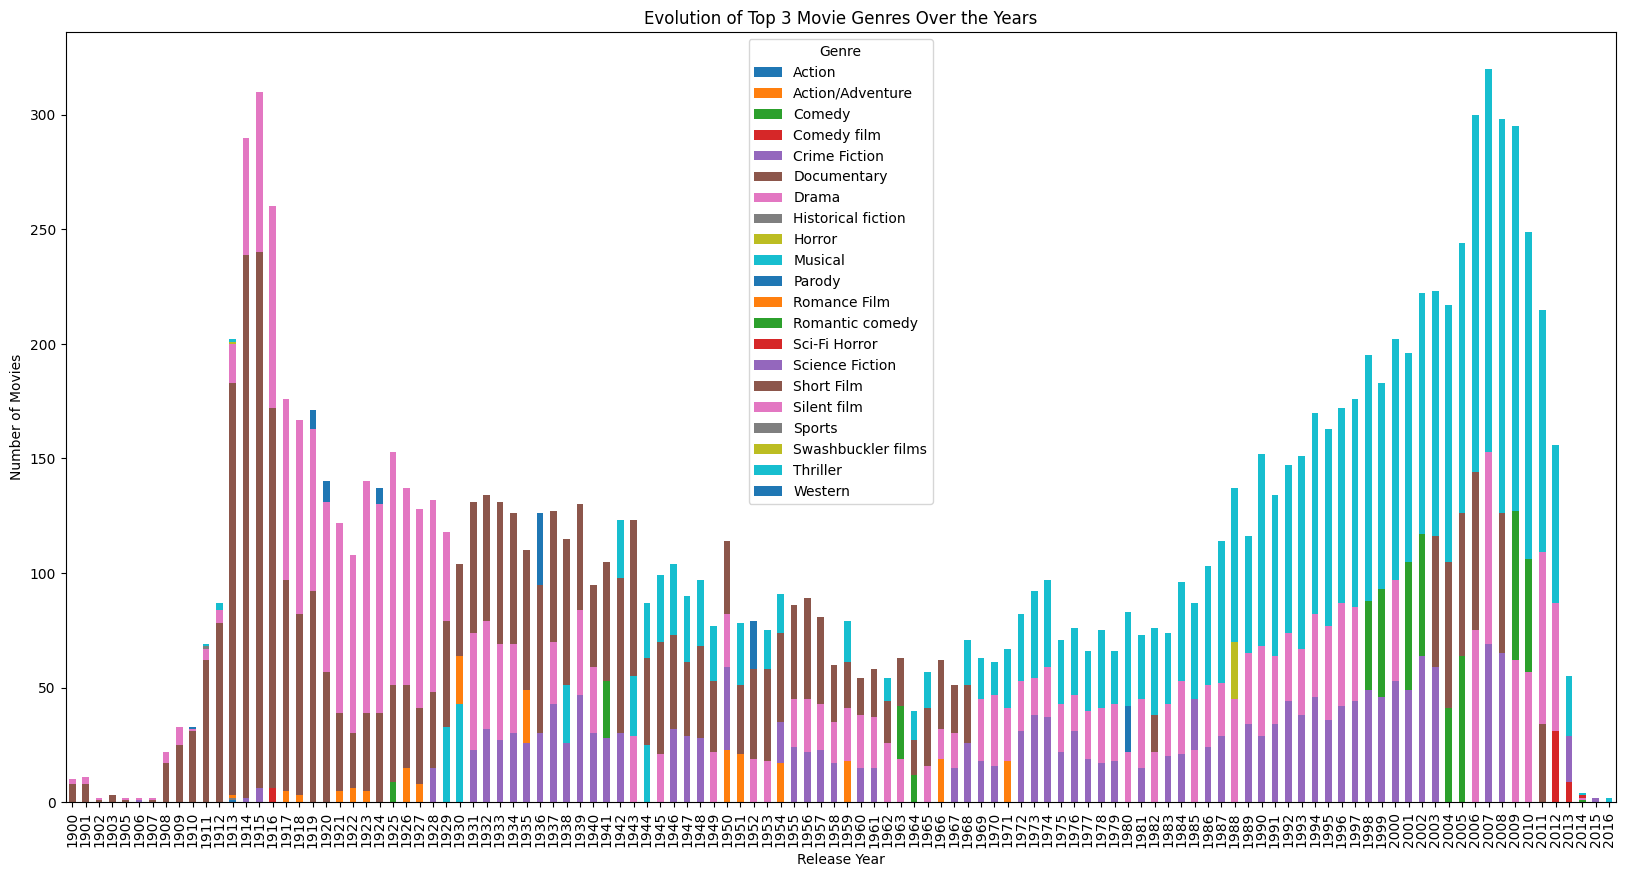

In [29]:
# Select the three most popular genres for each year
top_genres = genre_counts_pivot.rank(axis=1, ascending=False, method='min') <= 3

# Filter the DataFrame to only include the top genres
genre_counts_top = genre_counts_pivot.where(top_genres)

# Drop any columns that are all NaN (i.e., genres that were not in the top three for any year)
genre_counts_top = genre_counts_top.dropna(axis=1, how='all')

# Plot the stacked bar chart
genre_counts_top.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Evolution of Top 3 Movie Genres Over the Years')
plt.legend(title='Genre')
plt.xticks(rotation=90)
plt.show()


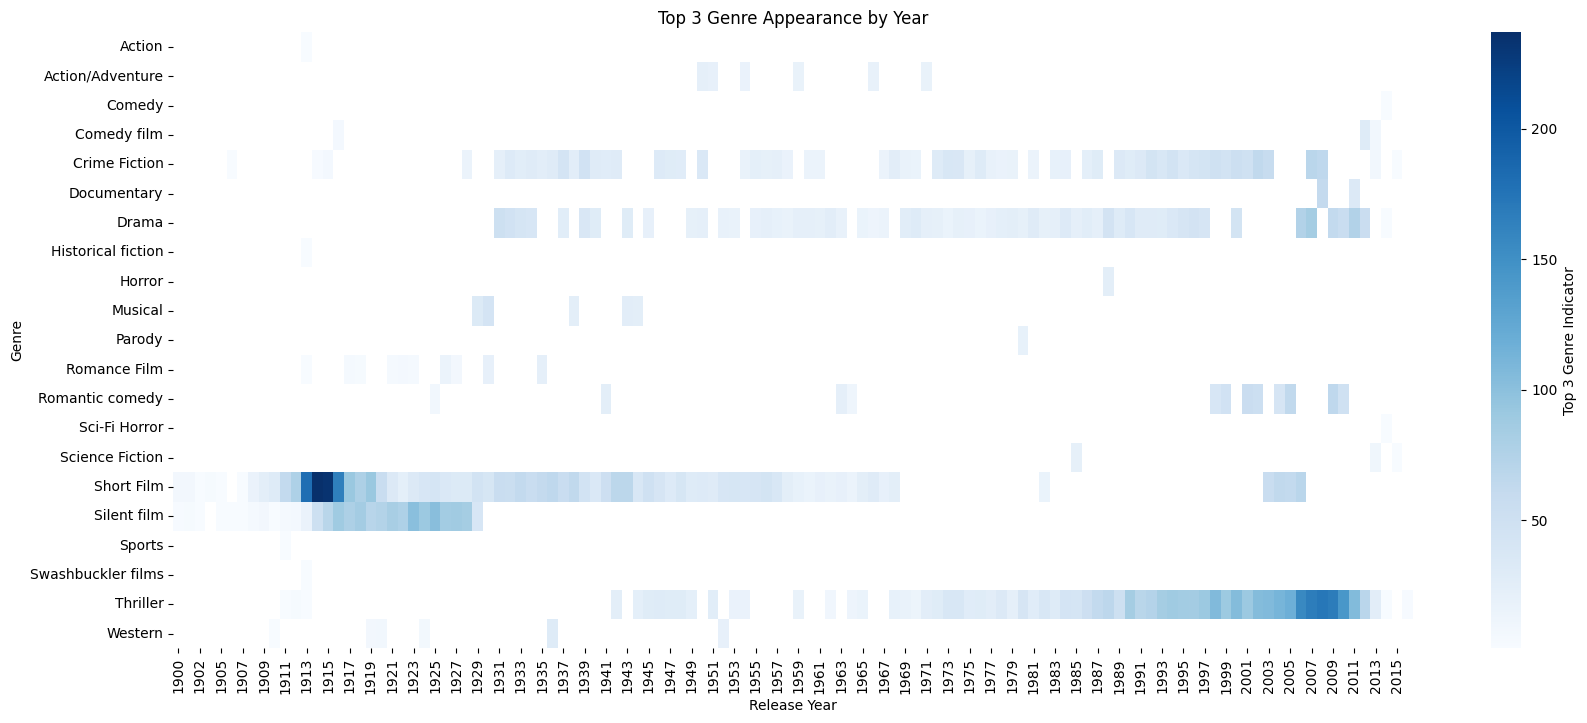

In [30]:
# Plot a heatmap showing top 3 genre appearances across years
plt.figure(figsize=(20, 8))
sns.heatmap(genre_counts_top.T, cmap="Blues", cbar_kws={'label': 'Top 3 Genre Indicator'})
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.title("Top 3 Genre Appearance by Year")
plt.show()

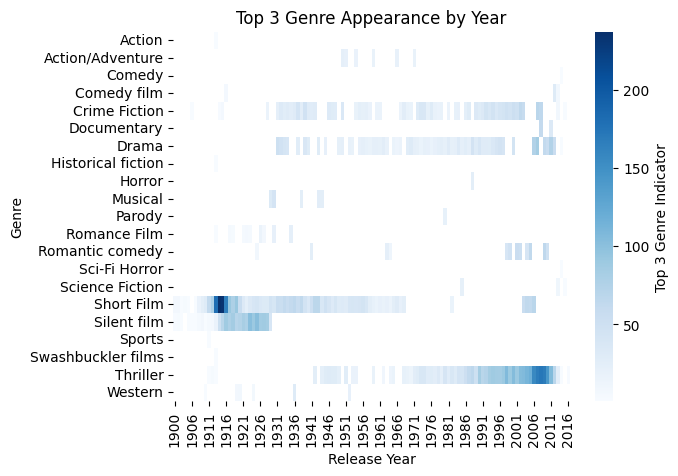

In [31]:
sns.heatmap(genre_counts_top.T, cmap="Blues", cbar_kws={'label': 'Top 3 Genre Indicator'})
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.title("Top 3 Genre Appearance by Year")
plt.show()

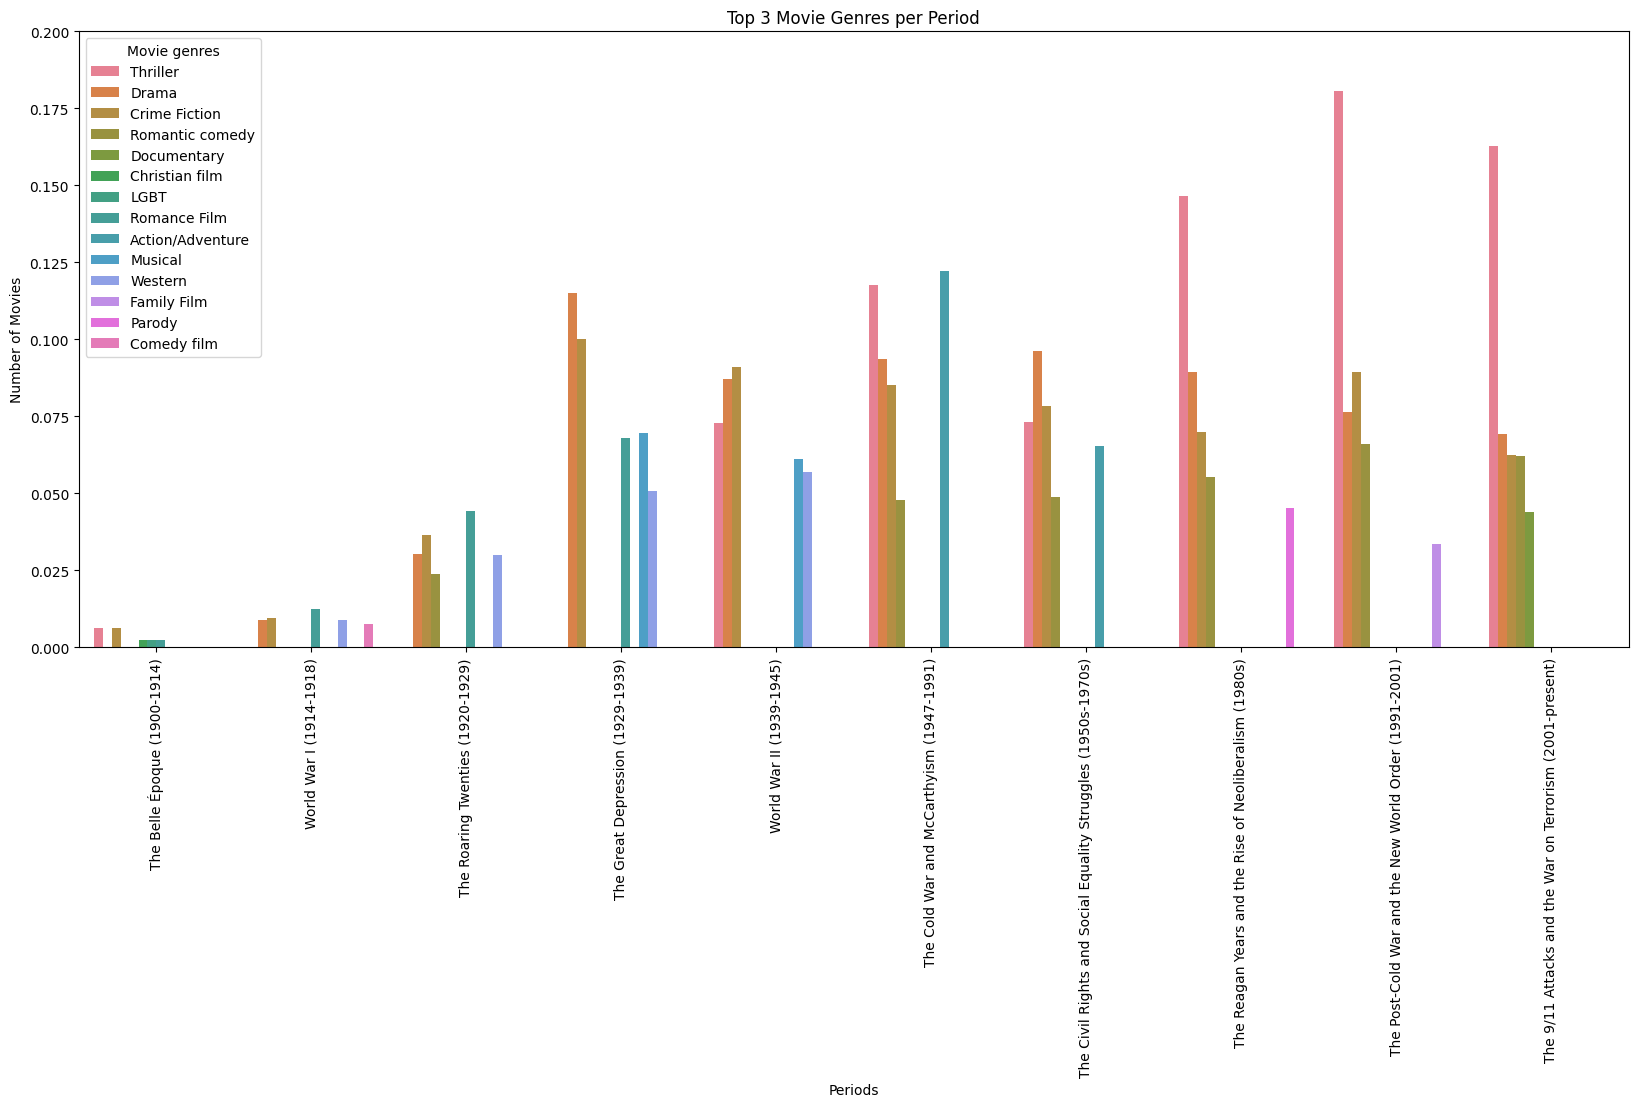

In [32]:
# Explode the 'Period' column to handle lists
movies_2df_exploded = movies_2df.explode('Period')

movies_2df_filtered = movies_2df_exploded[~movies_2df_exploded['Movie genres'].isin(unwanted_genres)]

# Group the movies by period and genre, and count the number of movies in each group
period_counts = movies_2df_filtered.groupby(['Period', 'Movie genres']).size().reset_index(name='count')
pc = movies_2df_exploded.groupby(['Period', 'Movie genres']).size().reset_index(name='count')

# Sort the counts in descending order for each period to get the top genres
period_counts_sorted = period_counts.sort_values(by=['Period', 'count'], ascending=[True, False])
pcs = pc.sort_values(by=['Period', 'count'], ascending=[True, False])

# Count the total number of movies in each period
#total_movies_per_period = period_counts_sorted.groupby('Period')['count'].transform('sum')
tot = pcs.groupby('Period')['count'].transform('sum')

# Normalize the counts by dividing each genre's count by the total number of movies in that period
period_counts_sorted['normalized_count'] = period_counts_sorted['count'] / tot #total_movies_per_period

# Extract the top 3 genres for each period
top_3_genres_per_period_normalized = period_counts_sorted.groupby('Period').head(5).reset_index(drop=True)


# You can also plot the top 3 genres for each period (optional)
plt.figure(figsize=(20, 8))
sns.barplot(data=top_3_genres_per_period_normalized, x='Period', y='normalized_count', hue='Movie genres', order=period_order_map)
plt.xlabel('Periods')
plt.ylabel('Number of Movies')
plt.title('Top 3 Movie Genres per Period')
plt.xticks(rotation=90)
plt.ylim(0, 0.2)
plt.show()

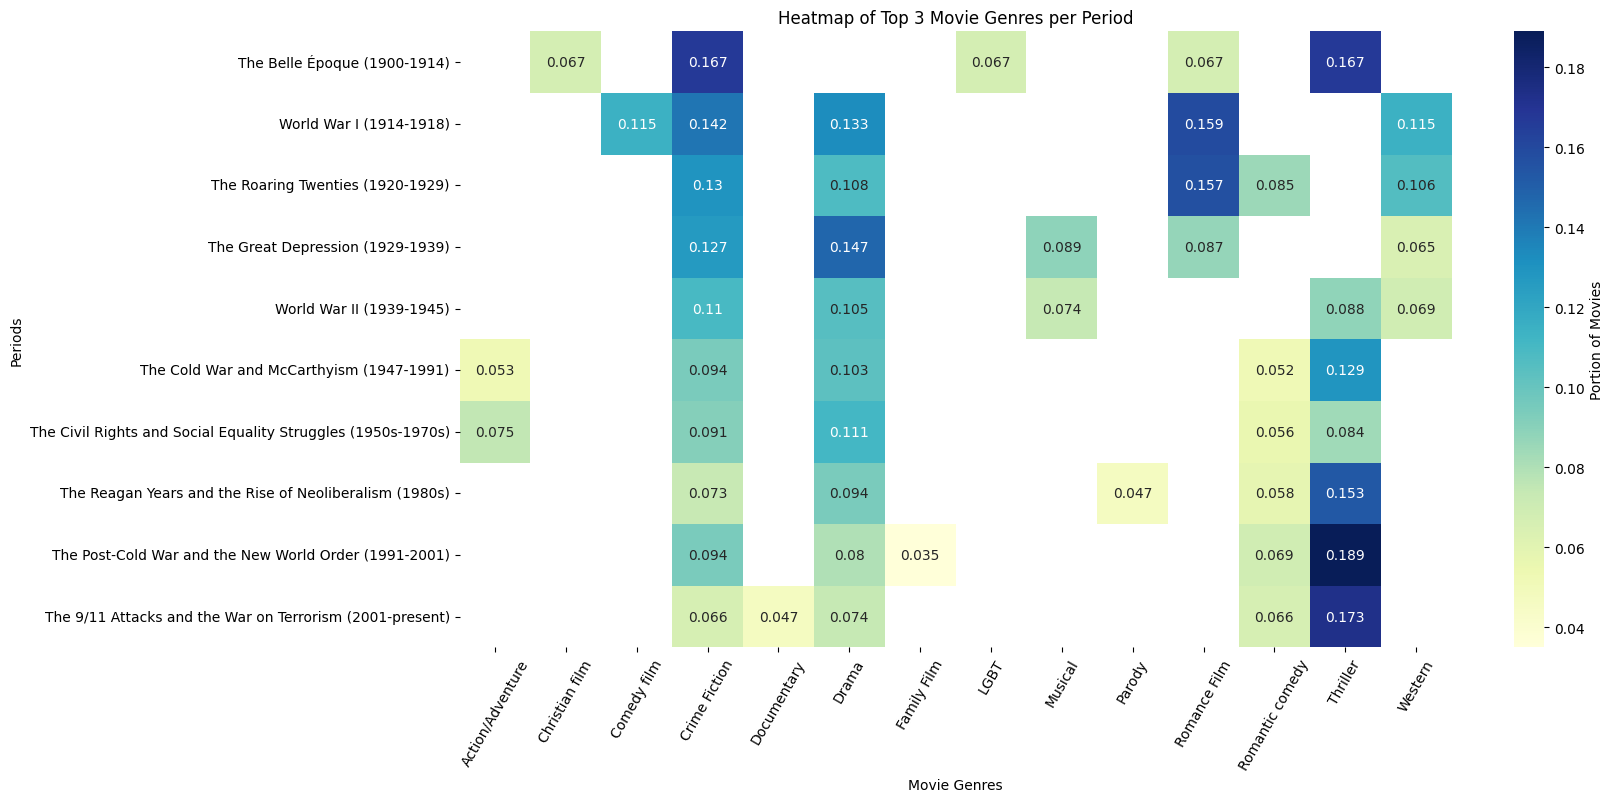

In [33]:
# Pivot the table to have periods as rows and genres as columns, with movie counts as values
period_counts_pivot = period_counts.pivot(index='Period', columns='Movie genres', values='count')

# Select top 3 genres for each period based on the count
top_genres_list = period_counts_pivot.apply(lambda x: x.nlargest(5).index, axis=1)

period_counts_pivot_normalized = period_counts_pivot.div(period_counts_pivot.sum(axis=1), axis=0)

# Round the values to 2 decimal places
period_counts_pivot_normalized = period_counts_pivot_normalized.round(3)

# Select top 3 genres for each period based on the count
top_genres_list = period_counts_pivot_normalized.apply(lambda x: x.nlargest(5).index, axis=1)

# Create a new DataFrame to store the counts for the top 3 genres per period
period_counts_pivot_top_3 = period_counts_pivot_normalized.apply(
    lambda x: x[top_genres_list.loc[x.name]], axis=1
)

# Order the periods based on the dictionary
ordered_periods = sorted(period_counts_pivot_top_3.index, key=lambda x: period_order_map.get(x, float('inf')))

# Reindex the DataFrame to match the order of periods in ordered_periods
period_counts_pivot_top_3 = period_counts_pivot_top_3.loc[ordered_periods]

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(period_counts_pivot_top_3, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Portion of Movies'})
plt.title('Heatmap of Top 3 Movie Genres per Period')
plt.xlabel('Movie Genres')
plt.ylabel('Periods')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.show()

In [34]:
# Transpose the DataFrame so genres become rows and periods become columns
transposed_top_3 = period_counts_pivot_top_3.transpose()

# For each genre, select the top 3 periods with the highest values
top_3_genre_values = transposed_top_3.apply(lambda x: x.nlargest(3), axis=1)

# Print or examine the results
top_3_genre_values

Period,The 9/11 Attacks and the War on Terrorism (2001-present),The Belle Époque (1900-1914),The Civil Rights and Social Equality Struggles (1950s-1970s),The Cold War and McCarthyism (1947-1991),The Great Depression (1929-1939),The Post-Cold War and the New World Order (1991-2001),The Reagan Years and the Rise of Neoliberalism (1980s),The Roaring Twenties (1920-1929),World War I (1914-1918),World War II (1939-1945)
Movie genres,,,,,,,,,,
Action/Adventure,NaN,NaN,0.075,0.053,NaN,NaN,NaN,NaN,NaN,NaN
Christian film,NaN,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comedy film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115,NaN
Crime Fiction,NaN,0.167,NaN,NaN,NaN,NaN,NaN,0.130,0.142,NaN
Documentary,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,NaN,NaN,0.111,NaN,0.147,NaN,NaN,NaN,0.133,NaN
Family Film,NaN,NaN,NaN,NaN,NaN,0.035,NaN,NaN,NaN,NaN
LGBT,NaN,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Musical,NaN,NaN,NaN,NaN,0.089,NaN,NaN,NaN,NaN,0.074


/var/folders/5t/_73p5_pn21l1z224x51yr4f00000gn/T/ipykernel_58790/1857391568.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


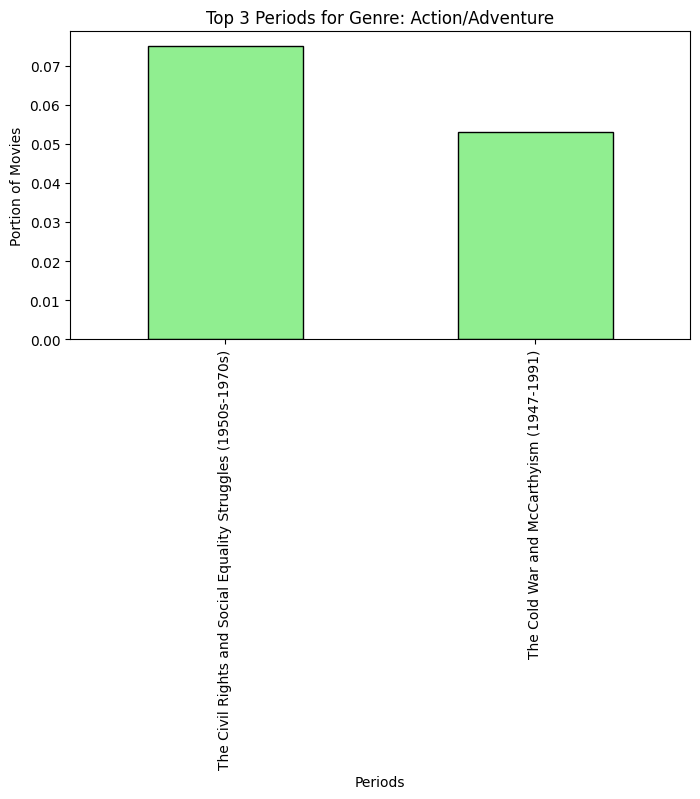

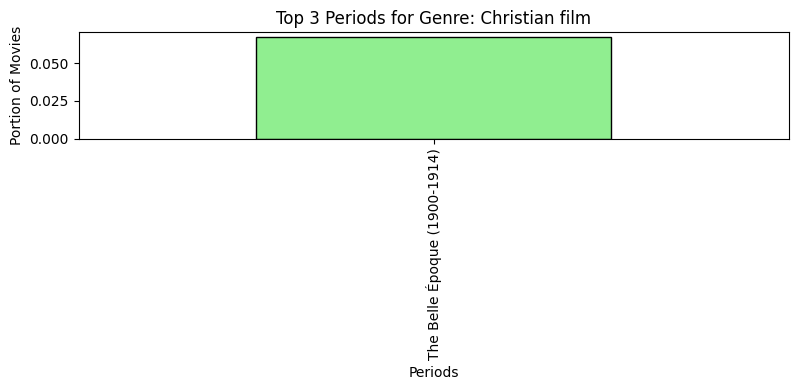

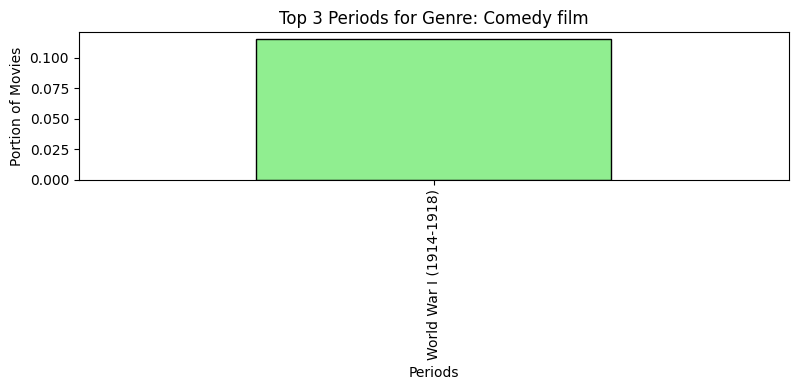

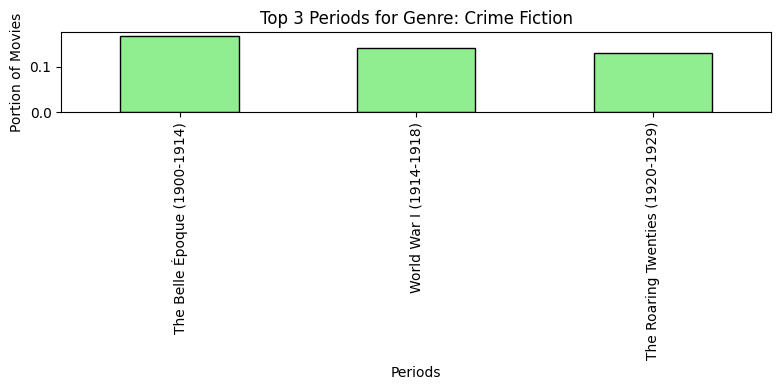

/var/folders/5t/_73p5_pn21l1z224x51yr4f00000gn/T/ipykernel_58790/1857391568.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


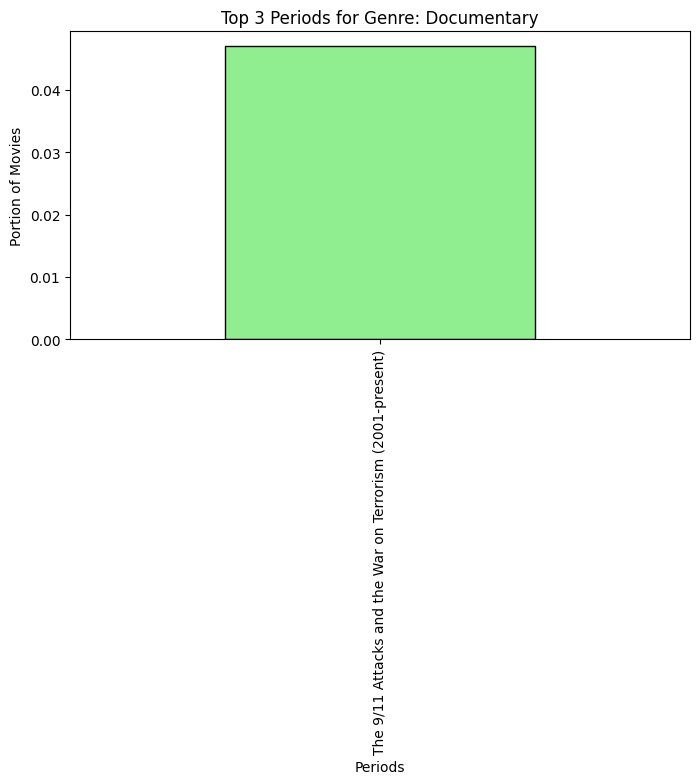

/var/folders/5t/_73p5_pn21l1z224x51yr4f00000gn/T/ipykernel_58790/1857391568.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


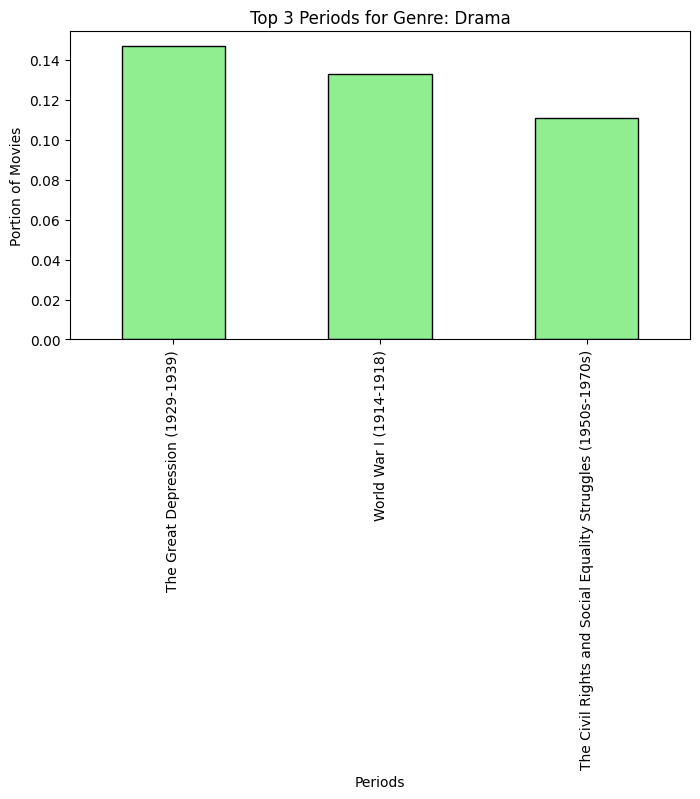

/var/folders/5t/_73p5_pn21l1z224x51yr4f00000gn/T/ipykernel_58790/1857391568.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


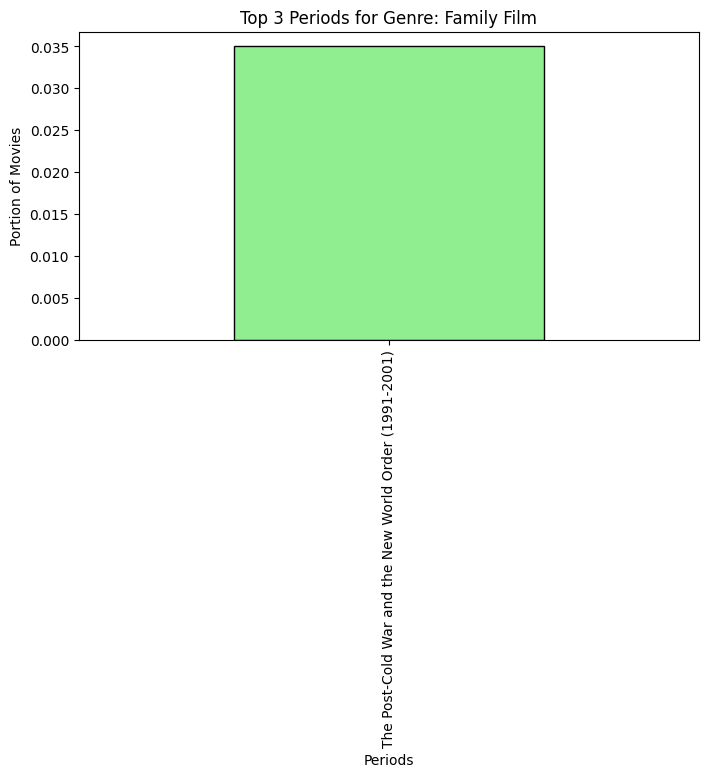

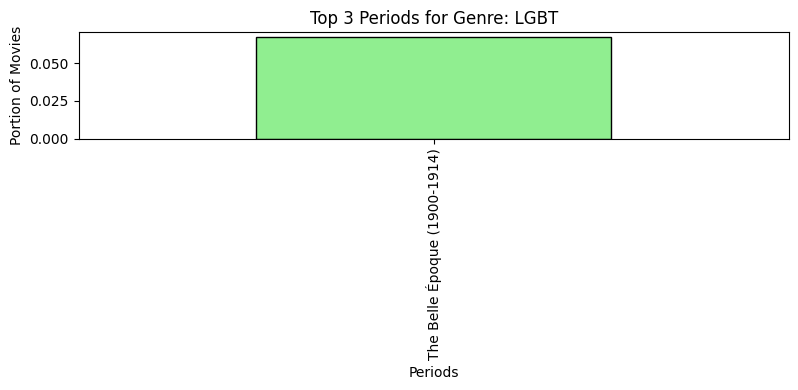

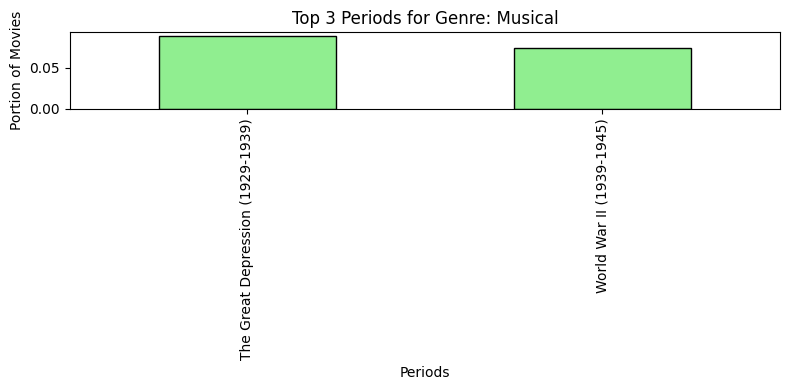

/var/folders/5t/_73p5_pn21l1z224x51yr4f00000gn/T/ipykernel_58790/1857391568.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


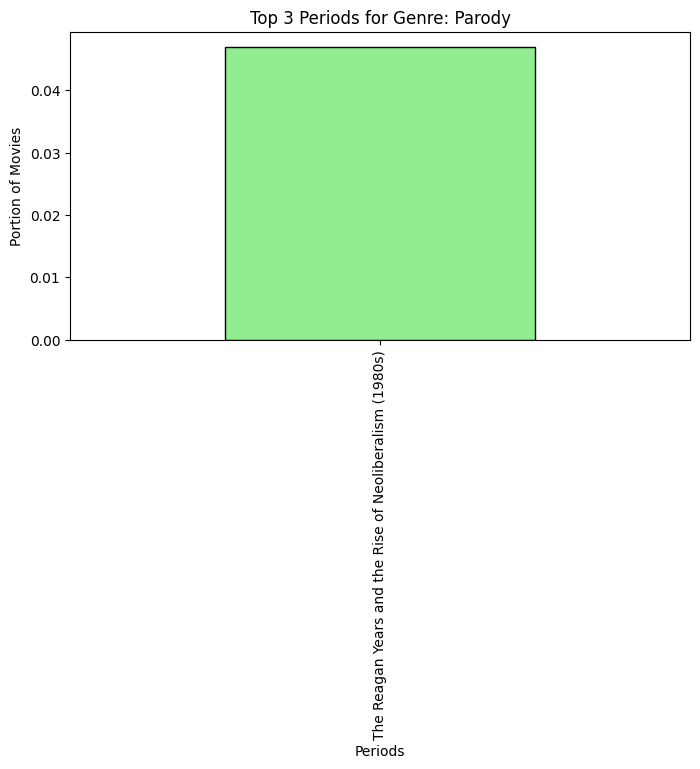

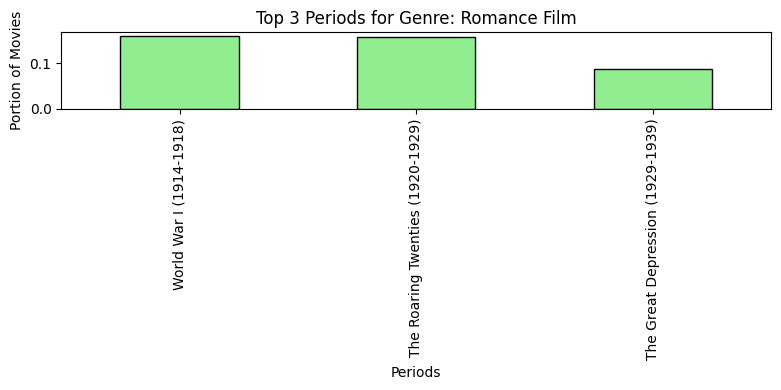

/var/folders/5t/_73p5_pn21l1z224x51yr4f00000gn/T/ipykernel_58790/1857391568.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


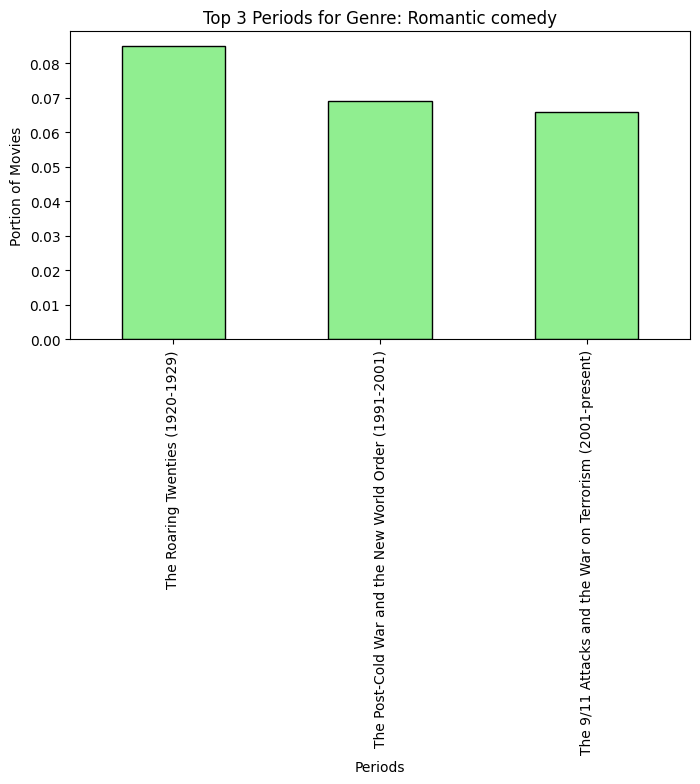

/var/folders/5t/_73p5_pn21l1z224x51yr4f00000gn/T/ipykernel_58790/1857391568.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


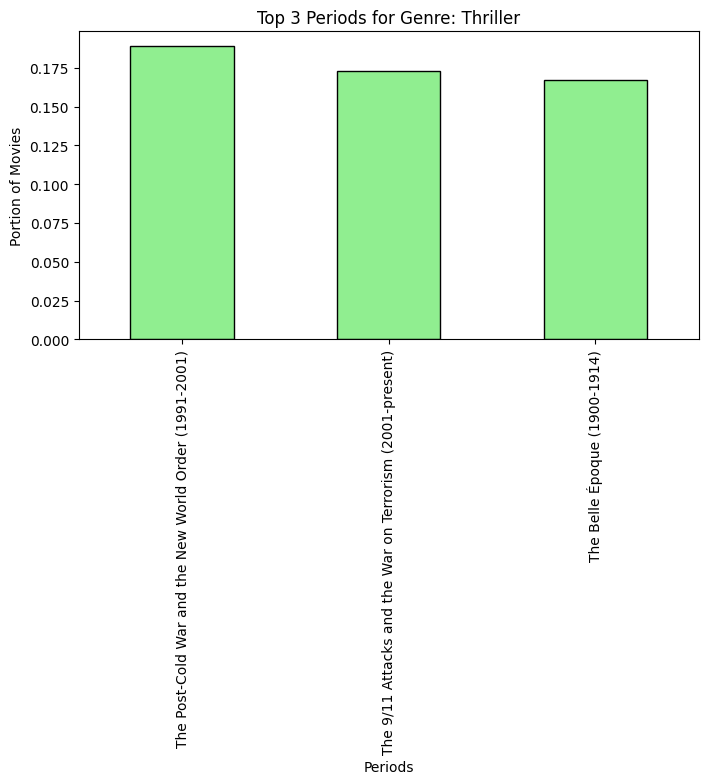

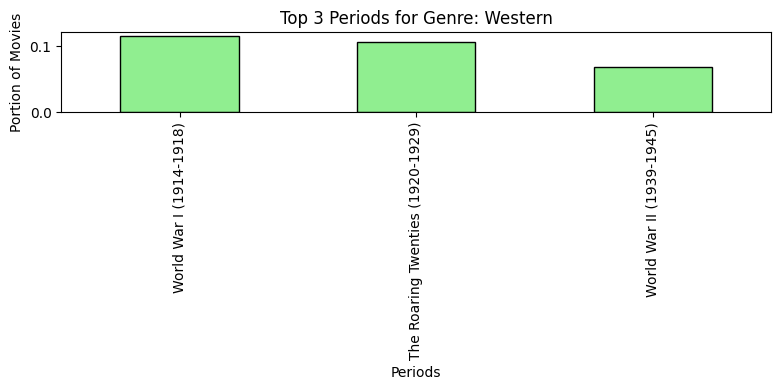

In [35]:
# barplot has no meaning here, it is just to display the 3 main or fewer periods for each main genre. 
# Loop through each genre to extract the top 3 periods with the highest score
for genre in period_counts_pivot_top_3.columns:
    # Get the corresponding values for the genre across all periods
    genre_data = period_counts_pivot_top_3[genre]
    
    # Count the number of NaN values for this genre
    nan_count = genre_data.count()

    # Get the top 3 periods with the highest values
    if nan_count < 3: 
        top_3_periods = genre_data.nlargest(nan_count)
    else: 
        top_3_periods = genre_data.nlargest(3)

    # Plot a bar chart for the top 3 periods for this genre
    plt.figure(figsize=(8, 4))
    top_3_periods.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Top 3 Periods for Genre: {genre}')
    plt.xlabel('Periods')
    plt.ylabel('Portion of Movies')
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [36]:
# Prepare a list to store the data for all genres
all_genres_data = []

# Loop through each genre to extract the top 3 periods with the highest score
for genre in period_counts_pivot_top_3.columns:
    # Get the corresponding values for the genre across all periods
    genre_data = period_counts_pivot_top_3[genre]
    
    # Count the number of NaN values for this genre
    nan_count = genre_data.count()

    # Get the top 3 periods with the highest values
    if nan_count < 3: 
        top_3_periods = genre_data.nlargest(nan_count)
    else: 
        top_3_periods = genre_data.nlargest(3)

    # Prepare a list of themes for the top periods
    themes_for_top_periods = [periods_events_map[period] for period in top_3_periods.index]
    
    # Create the table with genre in one row, periods in another, and events in the last row
    table_data = {
        'Genre': [genre] * len(top_3_periods),
        'Periods': top_3_periods.index,
        'Events': ["; ".join(themes) for themes in themes_for_top_periods]
    }
    
    # Create a DataFrame for the genre
    genre_df = pd.DataFrame(table_data)
    
    # Append genre table data with empty row for separation
    all_genres_data.append(genre_df)
    all_genres_data.append(pd.DataFrame([['', '', '']], columns=['Genre', 'Periods', 'Events']))  # Empty row for separation

# Concatenate all the genre tables into one DataFrame
final_df = pd.concat(all_genres_data, ignore_index=True)

# Save the combined DataFrame to a CSV file
final_df.to_csv("All_Genres_Top_Periods.csv", index=False)

print("The data has been saved as a single CSV file.")

The data has been saved as a single CSV file.


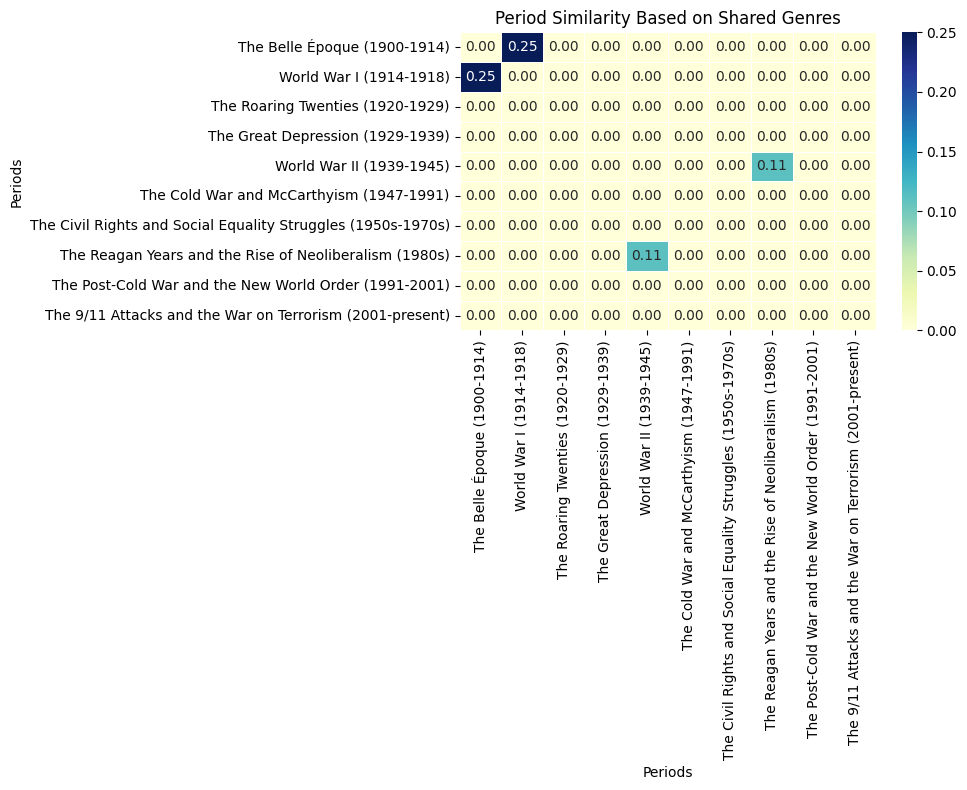

In [37]:
# Function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Create a list of periods and their associated genres
periods = list(periods_events_map.keys())
period_genres = [set(periods_events_map[period]) for period in periods]

# Create a similarity matrix using the Jaccard similarity
similarity_matrix = np.zeros((len(periods), len(periods)))

for i, genres_1 in enumerate(period_genres):
    for j, genres_2 in enumerate(period_genres):
        if i != j:
            similarity_matrix[i, j] = jaccard_similarity(genres_1, genres_2)

# Convert the matrix to a DataFrame for easier visualization
similarity_df = pd.DataFrame(similarity_matrix, columns=periods, index=periods)

# Plotting the similarity matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Period Similarity Based on Shared Genres")
plt.xlabel("Periods")
plt.ylabel("Periods")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33202 entries, 0 to 33201
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wikipedia movie ID  33202 non-null  int64  
 1   freebase_ID         33202 non-null  object 
 2   Movie name          33202 non-null  object 
 3   Movie release date  33202 non-null  int64  
 4   Movie runtime       29091 non-null  float64
 5   Movie languages     33202 non-null  object 
 6   Movie countries     33202 non-null  object 
 7   Movie genres        33202 non-null  object 
 8   IMDB_ID             30817 non-null  object 
 9   averageRating       29267 non-null  float64
 10  numVotes            29267 non-null  float64
 11  Period              33202 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 3.0+ MB


In [39]:
movies_df.describe()

,Wikipedia movie ID,Movie release date,Movie runtime,averageRating,numVotes
count,3.320200e+04,33202.000000,2.909100e+04,29267.000000,2.926700e+04
mean,1.350850e+07,1973.988073,1.252497e+02,6.080510,2.258782e+04
std,1.039356e+07,30.947831,6.327491e+03,1.144579,9.987357e+04
min,3.217000e+03,1900.000000,5.000000e-01,1.300000,5.000000e+00
25%,4.036292e+06,1946.000000,7.700000e+01,5.500000,3.060000e+02
50%,1.197715e+07,1984.000000,9.100000e+01,6.200000,1.156000e+03
75%,2.207676e+07,2002.000000,1.020000e+02,6.900000,5.785500e+03
max,3.750192e+07,2016.000000,1.079281e+06,9.600000,2.962241e+06


In [40]:
print("percentage of NaNs per columns")
movies_df.isna().mean() * 100

percentage of NaNs per columns


Wikipedia movie ID     0.000000
freebase_ID            0.000000
Movie name             0.000000
Movie release date     0.000000
Movie runtime         12.381784
Movie languages        0.000000
Movie countries        0.000000
Movie genres           0.000000
IMDB_ID                7.183302
averageRating         11.851696
numVotes              11.851696
Period                 0.000000
dtype: float64

In [41]:
movies_df.sample(10)

,Wikipedia movie ID,freebase_ID,Movie name,Movie release date,Movie runtime,Movie languages,Movie countries,Movie genres,IMDB_ID,averageRating,numVotes,Period
28427,15233634,/m/03hmtn0,Standing Silent Nation,2006,53.0,['English Language'],['United States of America'],['Documentary'],tt0790753,8.1,25.0,[The 9/11 Attacks and the War on Terrorism (20...
8577,963435,/m/03tv11,Swordfish,2001,97.0,"['English Language', 'German Language']","['United States of America', 'Australia']","['Thriller', 'Crime Fiction', 'Gangster Film',...",tt0244244,6.5,198512.0,[The Post-Cold War and the New World Order (19...
2253,18613446,/m/04gsslx,Wild Tigers I Have Known,2006,81.0,['English Language'],['United States of America'],"['LGBT', 'Indie', 'Gay', 'Gay Interest', 'Comi...",tt0430768,6.0,2330.0,[The 9/11 Attacks and the War on Terrorism (20...
3648,21398995,/m/05f2_ts,Hand of God,2006,NaN,[],['United States of America'],"['Culture & Society', 'Social issues', 'Docume...",tt0805542,8.6,61.0,[The 9/11 Attacks and the War on Terrorism (20...
16201,19462641,/m/04m_yvb,The Murder of Fred Hampton,1971,88.0,['English Language'],['United States of America'],"['Culture & Society', 'Biography', 'History', ...",tt0067456,7.5,586.0,[The Cold War and McCarthyism (1947-1991)]
27550,24707025,/m/080fxy6,Bereavement,2010,103.0,['English Language'],['United States of America'],"['Horror', 'Slasher']",tt1100051,5.0,8255.0,[The 9/11 Attacks and the War on Terrorism (20...
6830,3300211,/m/0946bb,Assassins,1995,133.0,"['English Language', 'German Language', 'Spani...","['France', 'United States of America']","['Thriller', 'Crime Fiction', 'Chase Movie', '...",tt0112401,6.3,89273.0,[The Post-Cold War and the New World Order (19...
18368,3175826,/m/08x6vf,SubUrbia,1996,121.0,['English Language'],['United States of America'],"['Indie', 'Comedy-drama', 'Drama', 'Comedy', '...",tt0120238,6.7,10964.0,[The Post-Cold War and the New World Order (19...
15713,9391313,/m/0286_v4,Fly-by-Night,1942,74.0,['English Language'],['United States of America'],"['Thriller', 'Film noir', 'Black-and-white']",tt0034740,6.5,388.0,[World War II (1939-1945)]
10103,19421454,/m/04n4ln0,Bird of Paradise,1932,154.0,['English Language'],['United States of America'],"['Romance Film', 'Black-and-white']",tt0022689,6.0,1643.0,[The Great Depression (1929-1939)]


<Axes: xlabel='genre', ylabel='count'>

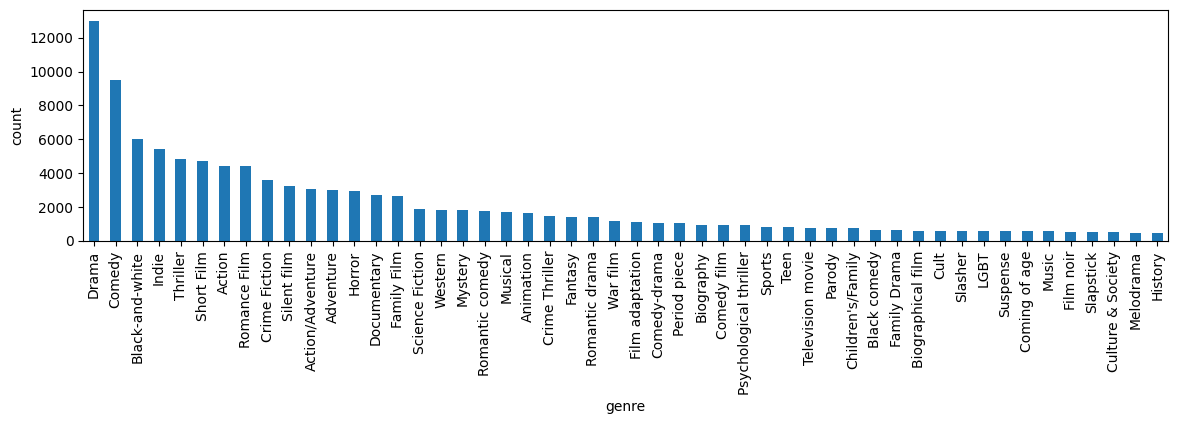

In [63]:
import ast

flattened = [genre for items in movies_df["Movie genres"] for genre in ast.literal_eval(items)]

genres = pd.Series(flattened).value_counts().head(50)  #.apply(get_genre)
plt.figure(figsize=(14,3))
plt.xlabel("genre")
plt.ylabel("count")
genres.plot(kind="bar")

<Axes: title={'center': 'Top 4 genre per year'}, xlabel='Movie release year'>

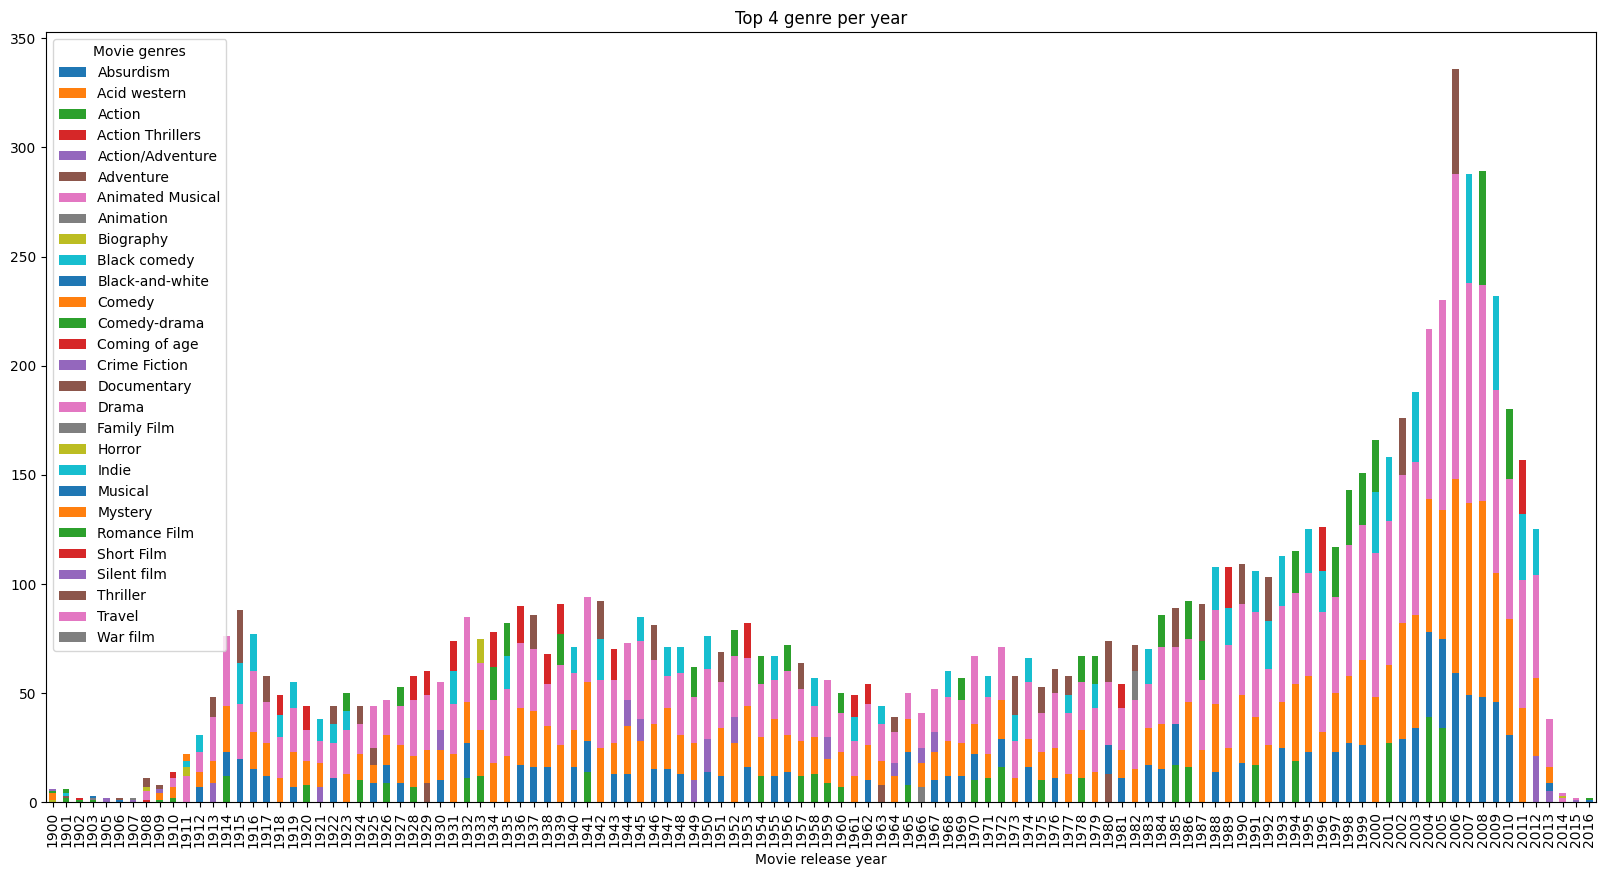

In [65]:
genre_counts = movies_df.copy(deep=True)
def get_year(string):
    try: return string.split("-")[0]
    except: return ""
genre_counts["Movie release year"] = genre_counts['Movie release date'].astype(int)
#genre_counts["Movie release date"].apply(get_year)

flattened = [genre for items in movies_df["Movie genres"] for genre in ast.literal_eval(items)]
genres = pd.Series(flattened)

genre_counts["Movie genres"] = genres

genre_counts = genre_counts.groupby(["Movie release year", "Movie genres"]).size().unstack(fill_value=0)

genre_counts.apply(lambda x: x.nlargest(4), axis=1).plot(kind="bar", stacked=True, figsize=(20, 10),
                                                         title="Top 4 genre per year")
#plt.xlim(1910,2011)

<Axes: title={'center': 'Normalized genre distribution per year'}, xlabel='Movie release year'>

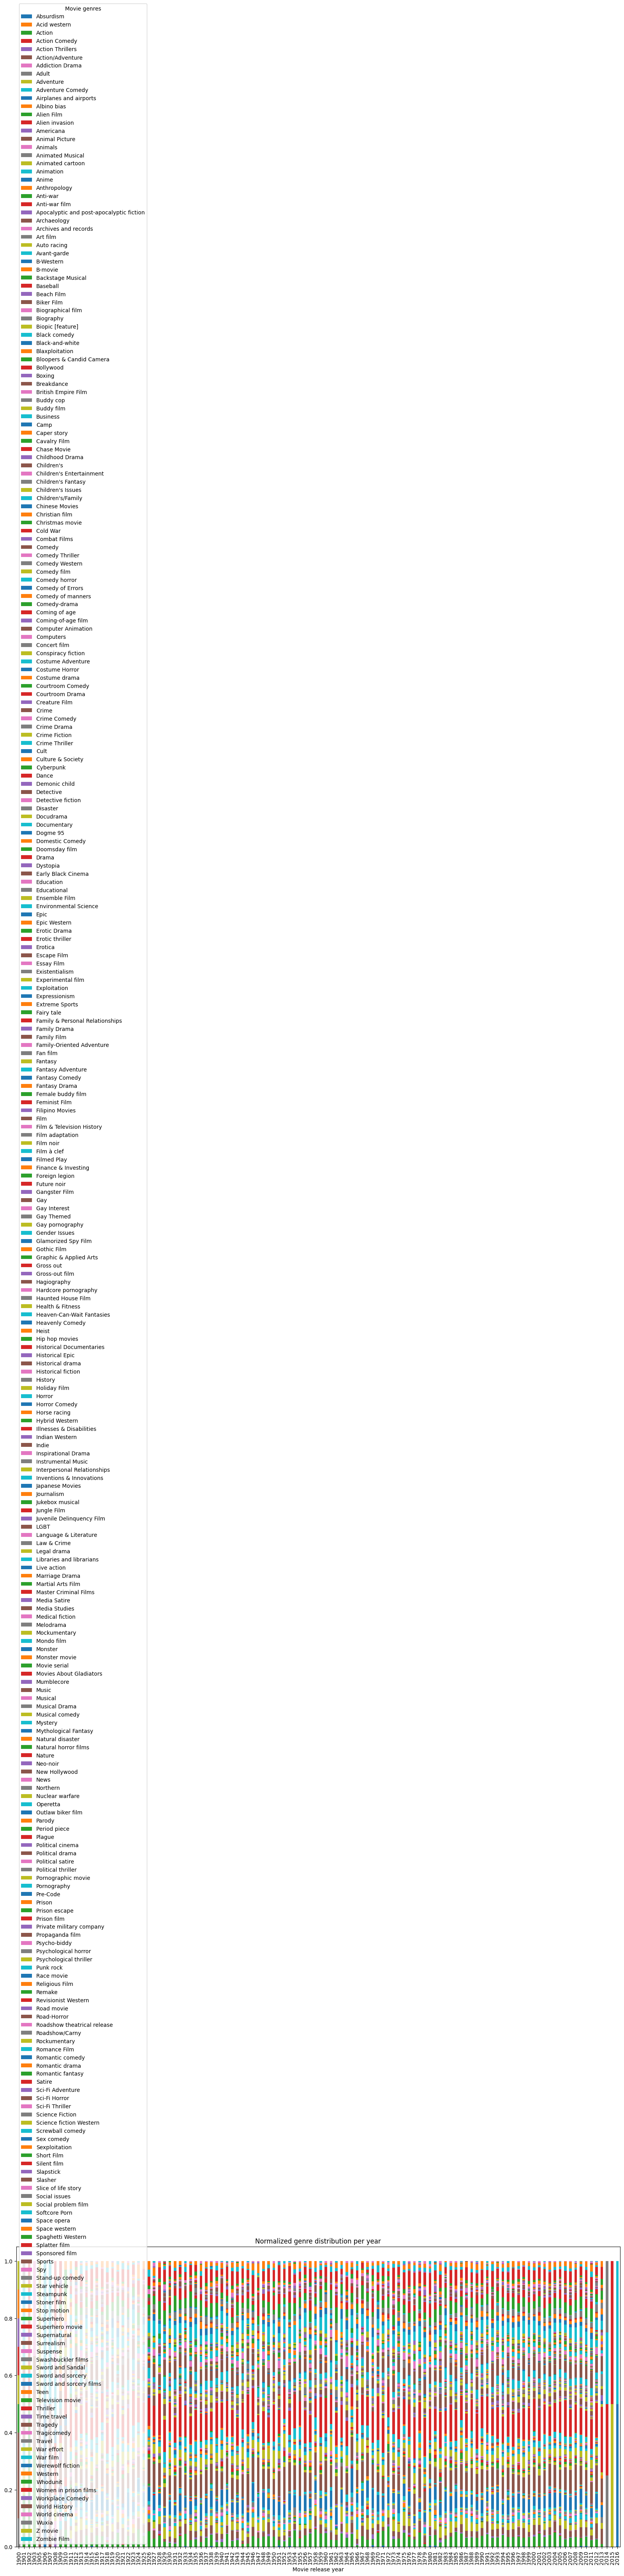

In [66]:
genre_counts.div(genre_counts.sum(axis=1), axis=0).plot(kind="bar", stacked=True, figsize=(20, 10),title="Normalized genre distribution per year")

<Axes: xlabel='country', ylabel='log count'>

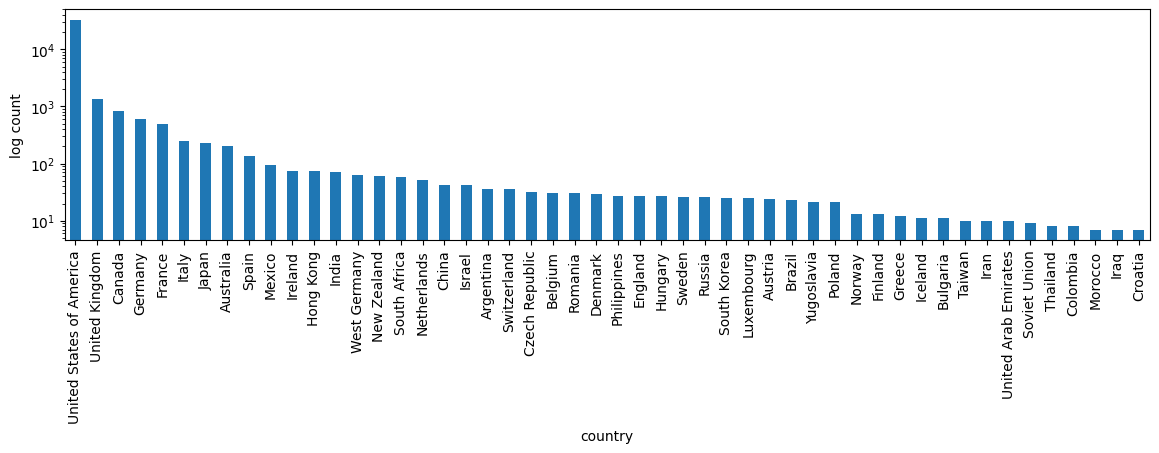

In [71]:
flattened = [genre for items in movies_df["Movie countries"] for genre in ast.literal_eval(items)]
countries = pd.Series(flattened).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("country")
plt.ylabel("log count")
plt.yscale("log")
countries.plot(kind="bar")

<Axes: xlabel='language', ylabel='log count'>

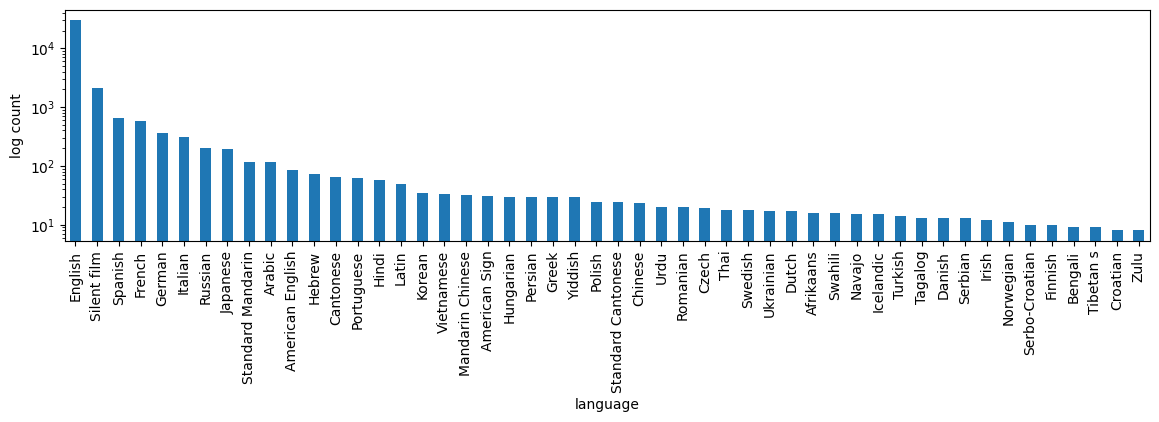

In [75]:
flattened = [genre.replace("Language", "").replace("language", "").strip() for items in movies_df["Movie languages"] for genre in ast.literal_eval(items)]
languages = pd.Series(flattened).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("language")
plt.ylabel("log count")
plt.yscale("log")
languages.plot(kind="bar")

<Axes: title={'center': 'Movie box office revenue distribution'}, xlabel='Movie box office revenue', ylabel='frequency'>

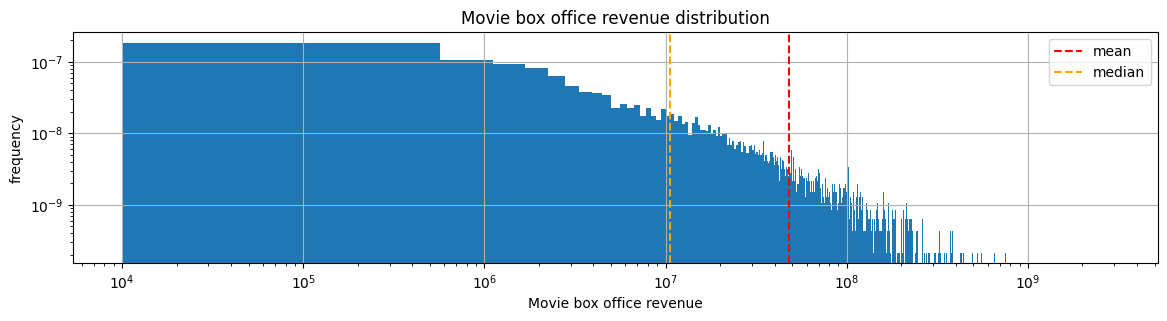

In [80]:
movies_df_unprocessed = pd.read_csv("data/movie.metadata.tsv", sep="\t", header=None)
movies_df_unprocessed.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]


plt.figure(figsize=(14,3))
plt.title("Movie box office revenue distribution")
plt.xlabel("Movie box office revenue")
plt.ylabel("frequency")
#plt.xlim(0, 100000000)
plt.xscale("log")
plt.yscale("log")
plt.axvline(movies_df_unprocessed["Movie box office revenue"].mean(), color="red", label="mean", linestyle="--")
plt.axvline(movies_df_unprocessed["Movie box office revenue"].median(), color="orange", label="median", linestyle="--")
plt.legend()
movies_df_unprocessed["Movie box office revenue"].hist(density=True, bins=5000)

In [81]:
print("Top 50 films with the highest movie box office revenue")
movies_df_unprocessed.sort_values(ascending=False, by="Movie box office revenue")[["Movie name", "Movie release date", "Movie box office revenue"]].head(50)

Top 50 films with the highest movie box office revenue


,Movie name,Movie release date,Movie box office revenue
23702,Avatar,2009-12-10,2.782275e+09
22256,Titanic,1997-11-01,2.185372e+09
28192,The Avengers,2012-04-11,1.511758e+09
30278,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09
18645,Transformers: Dark of the Moon,2011-06-23,1.123747e+09
80920,The Lord of the Rings: The Return of the King,2003-12-17,1.119930e+09
54719,The Dark Knight Rises,2012-07-16,1.078009e+09
69586,Toy Story 3,2010-06-12,1.063172e+09
14303,Pirates of the Caribbean: On Stranger Tides,2011-05-07,1.043872e+09
50039,Star Wars Episode I: The Phantom Menace,1999-05-19,1.027045e+09
